### Import The Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
plt.style.use('seaborn-bright')

### Summarize the dataset

In [3]:
dataset = pd.read_csv('Iris.csv')

In [4]:
# shape
print(dataset.shape)

(150, 6)


In [5]:
#head
dataset.drop(columns='Id', axis=1, inplace=True)
dataset.head(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# class distribution
print(dataset['Species'].value_counts())

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64


### Data Visualization

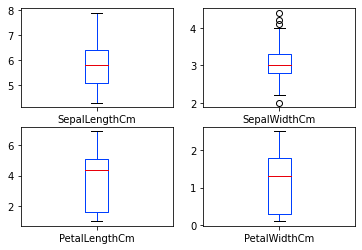

In [8]:
# box and whishker plots
dataset.plot(kind= 'box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

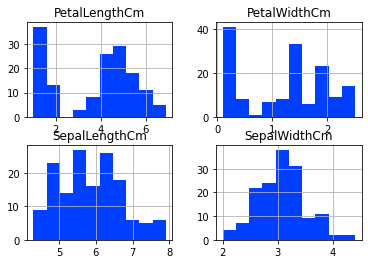

In [9]:
#histograms
dataset.hist()
plt.show()

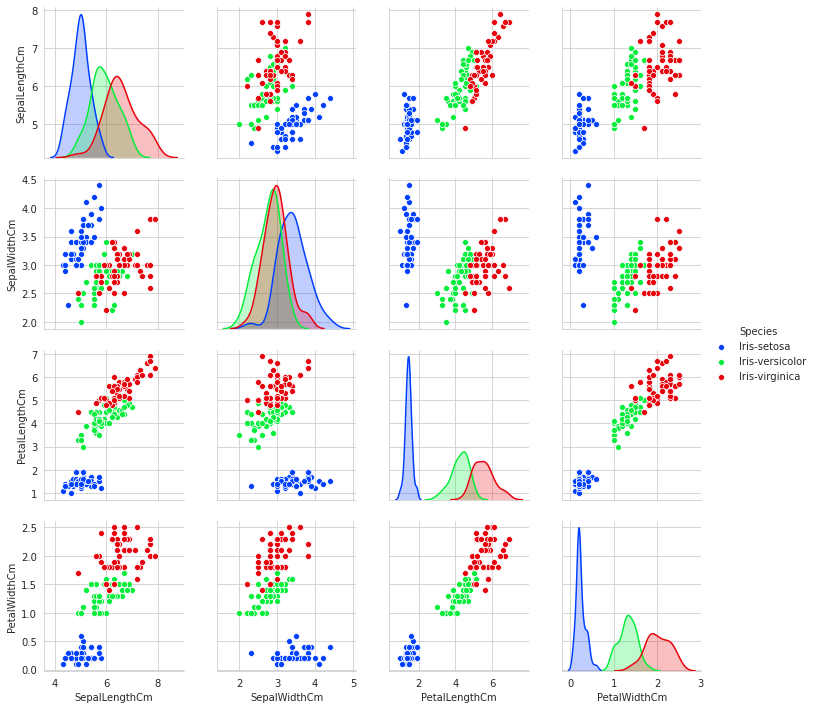

In [10]:
# scatter plots
sns.set_style('whitegrid')
sns.pairplot(data = dataset, hue='Species')
plt.show()

### Evaluate Some Algorithms

In [11]:
# Split the dataset into train test split
X = dataset.iloc[:,0:4]
Y = dataset.iloc[:, 4]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.33, random_state=42)

In [12]:
# Spot check algorithms
models = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN',KNeighborsClassifier()),
    ('SVC',SVC()),
    ('CART',DecisionTreeClassifier()),
    ('NV',GaussianNB())
]

#Evaluate the models in turn
#from collections import defaultdict
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('{0} : {1:.4f} ({2:.4f})'.format(name, cv_results.mean(), cv_results.std()))

LR : 0.9500 (0.0500)
LDA : 0.9800 (0.0400)
KNN : 0.9400 (0.0663)
SVC : 0.9500 (0.0671)
CART : 0.9100 (0.0943)
NV : 0.9400 (0.0800)


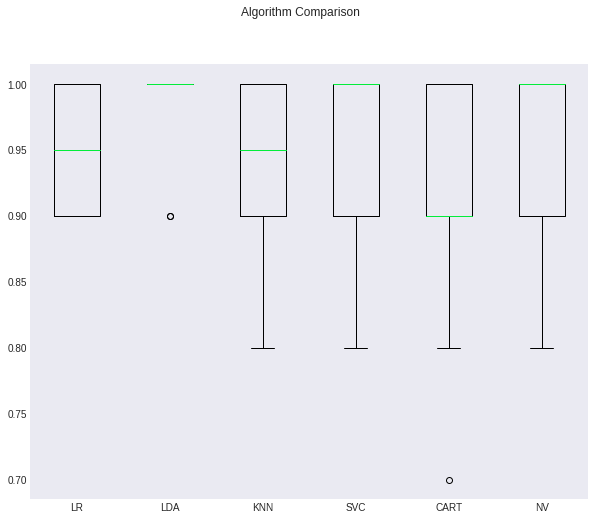

In [13]:
# Compare Algorithms
plt.style.use('seaborn-dark')
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Make Predictions

In [14]:
# make predictions with the validation data

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
preds = lda.predict(X_val)
print(accuracy_score(Y_val, preds))
print(confusion_matrix(Y_val, preds))
print(classification_report(Y_val, preds))

0.98
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

      micro avg       0.98      0.98      0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50

